# Data Analysis lab 4


Here, is a quick Python program to verify the results acquired by students after lab practice.

In [2]:
import numpy as np

# lower flows

q = 78/6.8 * 1000 #mm3/s   # flow rates
d = 3 #mm
dh = (3020) #mm head difference

def velocity(q, d):
    u = 4*q/(np.pi * d**2)
    return u

def hydraulic_grad(dh):
    #dh = h1-h2
    i = dh/524
    return i

def Reynolds(u, d):
    Re = u*d/(1.002)
    return Re
    
def headloss_coef(i, d, q):
    f = i * 9810 * (np.pi)**2 * d**5 / (8 * q**2)
    return f

#d = diameter(q, u)
u = velocity(q, d)
Re = Reynolds(u, d)
i = hydraulic_grad(dh)
f = headloss_coef(i, d, q)

print("- The flow rate q =", q/1000)
print("- The velocity u =", round(u,3)/10)
print("- The Reynolds number Re =", Re)
print("- The dh =", dh)
print("- The hydraulic gradient i =", i)
print("- The headloss coefficient f =", f)

- The flow rate q = 11.470588235294118
- The velocity u = 162.2756
- The Reynolds number Re = 4858.551744028741
- The dh = 3020
- The hydraulic gradient i = 5.763358778625954
- The headloss coefficient f = 0.128821785824825


In [5]:
# higher flows

q = (100/11.46) * 1000 #mm3/s
d = 3 #mm
dh = (2350) #mm


#d = diameter(q, u)
u = velocity(q, d)
Re = Reynolds(u, d)
i = hydraulic_grad(dh)
f = headloss_coef(i, d, q)

print("- The flow rate q =", round(q/1000, 3), "mm3/s")
print("- The velocity u =", round(u,3)/10)
print("- The Reynolds number Re =", Re)
print("- The dh =", dh)
print("- The hydraulic gradient i =", round(i,3))
print("- The headloss coefficient f =", f)

- The flow rate q = 8.726 mm3/s
- The velocity u = 123.44770000000001
- The Reynolds number Re = 3696.0388261730254
- The dh = 2350
- The hydraulic gradient i = 4.485
- The headloss coefficient f = 0.17321713452285292


- the slope is m = 0.003123862465409536
- the slope is m = 0.8956398160969099


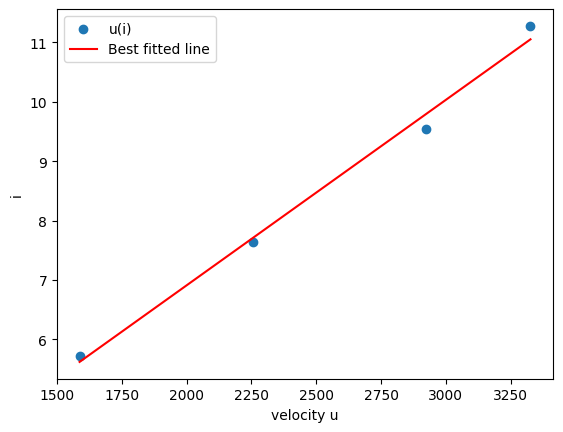

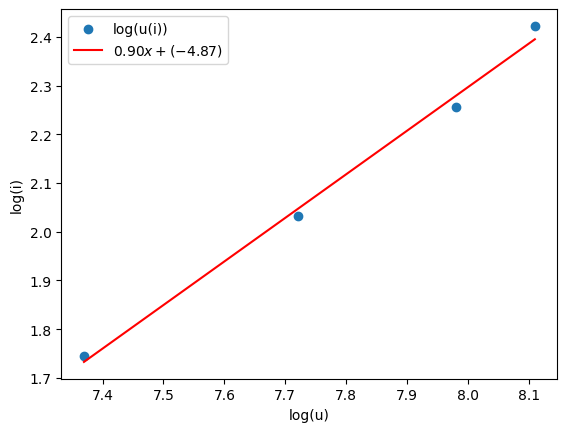

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

flows = [ 11.217, 15.944, 20.671, 23.511] #mL/s

delta_h = [3000, 4000, 5000, 5910] #mm

veloc = [velocity(j*1000, d) for j in flows] # mm/s

grad_h = [j/524 for j in delta_h]   # the hydraulic gradient

# linear regression
def linear_reg(veloc, grad_h):
    # A = np.vstack([grad_h, np.ones(len(grad_h))]).T
    # m, b = np.linalg.lstsq(A, veloc, rcond=None)[0]
    # line = [m*j+b for j in grad_h]
    # print("- the slope is m =", m)
    A = np.vstack([veloc, np.ones(len(veloc))]).T
    m, b = np.linalg.lstsq(A, grad_h, rcond=None)[0]
    line = [m*j+b for j in veloc]
    # results = linregress(veloc, grad_h)
    # m = results[0]
    # b = results[1]
    print("- the slope is m =", m)
    return line, m, b

# Slopes and intercepts
i_line, m1, b1 = linear_reg(veloc, grad_h)
logi_line, m2, b2 = linear_reg(np.log(veloc), np.log(grad_h))

# plot u(i)
plt.scatter(veloc, grad_h, label="u(i)")
plt.plot(veloc, i_line, 'r', label="Best fitted line")
plt.ylabel("i")
plt.xlabel("velocity u")
plt.legend()
plt.show()

#logline, m2, b2 = linear_reg(np.log(grad_h), np.log(veloc))

plt.scatter(np.log(veloc), np.log(grad_h),  label="log(u(i))")
plt.plot(np.log(veloc), logi_line, 'r', label=f"${m2:.2f}x+({b2:.2f})$")
plt.ylabel(r"Hydraulic gradient $\log(i)$")
plt.xlabel(r"Velocity $\log(u)$")
plt.legend()
plt.show()

## Hagen-Poiseuille Equation

The volumetric flow rate for a Newtonian laminar fluid in cylindrical pipe is expressed as:

$$
Q=\frac{\pi r^4(p_1-p_2)}{8\mu L}
$$

This expression can be rearranged and expressed as function of the diameter $d$, the hydraulic gradient $i$ and the mean flow velocity $u$. We write:

$$
u = \frac{d^2\cdot \rho g \cdot(h_1-h_2)}{32\mu L} \implies \mu = \frac{d^2\cdot \rho g \cdot i}{32u}
$$

## Proportionality i and u

From the log-log plot we can fit a linear regression. This allows us to establish the relation

$$
\log(u)=m\log(i)+b
$$

where $m$ and $b$ are the slope and the intercept, respectively.

We have determined $b$ to be a constant such that $(\forall\, b \in (-\infty, \infty))$, we can write

$$
\log(u) \propto m \log(i) \implies \log(i) \propto \log\left(u^{1/m}\right) \implies i\propto u^{1/m}
$$